### Lab N0.02

#### Clasificación de rótulos de tráfico utilizando CNN Le-Net

- Paola de León 20361
- Gabriela Contreas 20213


In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, losses


2023-08-20 18:46:49.277243: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Parte 1

In [2]:
# ABRIR Y DIVIDIR DATA 
d_test = pd.read_pickle("./Datos_Rotulos_Trafico/prueba.p")
d_train = pd.read_pickle("./Datos_Rotulos_Trafico/entrenamiento.p")
d_validation = pd.read_pickle("./Datos_Rotulos_Trafico/validacion.p")

In [3]:
# REDIMENSIONAR
train_feature= d_train["features"]
train_feature.shape

train_label = d_train["labels"]
train_label.shape


(34799,)

In [4]:
# NORMALIZAR 
train_featuresN = train_feature / 255

In [5]:
# DIVISION DE DATOS
train_features, test_features, train_labels, test_labels = train_test_split(train_feature, train_label, test_size=0.2, random_state=42)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)


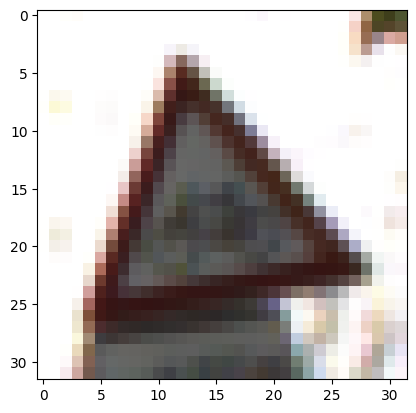

In [6]:
# VISUALIZACIÓN DE
plt.imshow(train_features[10])

#### Parte 3

In [7]:
#MODELO 
#ref: https://medium.com/analytics-vidhya/lenet-with-tensorflow-a35da0d503df

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=train_features.shape[1:]))
model.add(layers.AveragePooling2D(2))


model.add(layers.Conv2D(16, 5, activation='relu'))

model.add(layers.AveragePooling2D())



model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

#### Parte 4

In [11]:
# Compilar
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Entrenar
history = model.fit(train_features, train_labels, epochs=10, batch_size=32,
                    validation_data=(val_features, val_labels))

Epoch 1/10
696/696 [==============================] - 11s 14ms/step - loss: 1.6345 - accuracy: 0.6178 - val_loss: 0.6005 - val_accuracy: 0.8355
Epoch 2/10
696/696 [==============================] - 8s 11ms/step - loss: 0.3766 - accuracy: 0.8977 - val_loss: 0.2780 - val_accuracy: 0.9282
Epoch 3/10
696/696 [==============================] - 8s 11ms/step - loss: 0.2184 - accuracy: 0.9415 - val_loss: 0.2330 - val_accuracy: 0.9404
Epoch 4/10
696/696 [==============================] - 9s 13ms/step - loss: 0.1671 - accuracy: 0.9537 - val_loss: 0.2231 - val_accuracy: 0.9470
Epoch 5/10
696/696 [==============================] - 8s 12ms/step - loss: 0.1408 - accuracy: 0.9623 - val_loss: 0.2328 - val_accuracy: 0.9445
Epoch 6/10
696/696 [==============================] - 8s 12ms/step - loss: 0.1187 - accuracy: 0.9687 - val_loss: 0.1750 - val_accuracy: 0.9591
Epoch 7/10
696/696 [==============================] - 9s 13ms/step - loss: 0.1141 - accuracy: 0.9694 - val_loss: 0.1084 - val_accuracy: 0.976

### Parte 5: Evaluación del modelo

In [12]:
# Evaluar con test
test_loss, test_acc = model.evaluate(test_features, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


218/218 - 1s - loss: 0.1952 - accuracy: 0.9661 - 689ms/epoch - 3ms/step

Test accuracy: 0.9660919308662415
